# Лабораторная работа №1

---
Курс: Машинное обучение  
Выполнил: студент группы М8О-103М-20 Воробьев А.В.  
Проверил: Кондаратцев В.Л.

---
#### Ссылка на датасет "Billboard "The Hot 100" Songs":  
https://www.kaggle.com/dhruvildave/billboard-the-hot-100-songs

---
#### Подключим необходимые библиотеки:

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot
import seaborn as sns

---
## ////////////////////////////// 1. Предобработка данных //////////////////////////////

---
#### Прочитаем данные датасета:

In [21]:
data = pd.read_csv("charts.csv")

---
#### Посмотрим на первые 5 строк:

In [36]:
data.head()

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,1958-08-04,1,Poor Little Fool,Ricky Nelson,True,1,1
1,1958-08-04,2,Patricia,Perez Prado And His Orchestra,True,2,1
2,1958-08-04,3,Splish Splash,Bobby Darin,True,3,1
3,1958-08-04,4,Hard Headed Woman,Elvis Presley With The Jordanaires,True,4,1
4,1958-08-04,5,When,Kalin Twins,True,5,1


Каждая строка - это песня, объект исследования.  
Каждый столбец - признак объектов.

---
#### Посмотрим на размер данных:

In [24]:
data.shape

(326687, 7)

Видно, что у нас 326 687 строк и 7 столбцов.

---
#### Выведем названия столбцов:

In [26]:
data.columns

Index(['date', 'rank', 'song', 'artist', 'last-week', 'peak-rank',
       'weeks-on-board'],
      dtype='object')

---
#### Посмотрим обшую информацию по датафрейму и всем признакам:

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326687 entries, 0 to 326686
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            326687 non-null  object 
 1   rank            326687 non-null  int64  
 2   song            326687 non-null  object 
 3   artist          326687 non-null  object 
 4   last-week       293295 non-null  float64
 5   peak-rank       326687 non-null  int64  
 6   weeks-on-board  326687 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 17.4+ MB


Как мы видим, у нас присутствуют следующие типы данных признаков - числовые (ранг, количество недель в топе) и объектные (дата, наименование артиста/песни).  
Стоит заметить, что у признака "last-week" есть 33392 пропуска.

---
Поменяем тип колонки "last-week":

In [33]:
data['last-week'] = data['last-week'].astype('bool')

---
#### Посмотрим основные статистические характеристики данных по каждому числовому признаку (типы int64 и float64):
число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили.

In [34]:
data.describe()

,rank,peak-rank,weeks-on-board
count,326687.000000,326687.000000,326687.000000
mean,50.500938,41.039582,9.136880
std,28.866095,29.351217,7.566568
min,1.000000,1.000000,1.000000
25%,26.000000,14.000000,4.000000
50%,51.000000,38.000000,7.000000
75%,76.000000,66.000000,13.000000
max,100.000000,100.000000,87.000000


---
#### Теперь посмотрим статистику по нечисловым типам данных:

In [35]:
data.describe(include=['object', 'bool'])

,date,song,artist,last-week
count,326687,326687,326687,326687
unique,3267,24254,9994,1
top,2014-04-05,Stay,Taylor Swift,True
freq,100,208,1005,326687


---
#### Для категориальных (тип object) и булевых (тип bool) признаков можно воспользоваться методом value_counts.  
Посмотрим на распределение данных по нашей целевой переменной — song:

In [47]:
data.value_counts('song')

song
Stay                  208
Angel                 205
Heaven                194
Hold On               189
I Like It             188
                     ... 
Posted With Demons      1
For Good                1
Shake The Room          1
Barcelona               1
Escape From LA          1
Length: 24254, dtype: int64

---
Параметр "normalize" отображает данные в относительных величинах:

In [49]:
data['peak-rank'].value_counts(normalize=True)

1      0.050467
2      0.023604
3      0.021289
4      0.019346
5      0.017873
         ...   
96     0.005103
97     0.004895
98     0.004680
99     0.004157
100    0.003695
Name: peak-rank, Length: 100, dtype: float64

---
#### Сортировка

DataFrame можно отсортировать по значению какого-нибудь из признаков (ascending=False для сортировки по убыванию):

In [54]:
data.sort_values(by='rank', ascending=False).head(15)

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
326686,2021-03-13,100,Bichota,Karol G,True,72,13
292686,2014-09-06,100,Dare (La La La),Shakira,True,53,11
263286,2009-01-17,100,River Of Love,George Strait,True,87,4
148086,1986-12-20,100,Stranglehold,Paul McCartney,True,81,6
292986,2014-09-27,100,Good Kisser,Usher,True,65,19
81399,1974-03-09,100,Once You Understand,Think,True,100,1
221186,2000-12-23,100,Do You,Funkmaster Flex Featuring DMX,True,91,7
48899,1967-12-16,100,A Little Rain Must Fall,The Epic Splendor,True,100,1
196986,1996-05-04,100,Where Do U Want Me To Put It,Solo,True,50,18
164686,1990-02-24,100,This One's For The Children,New Kids On The Block,True,7,16


---
## ////////////////////////////// 2. Визуализация данных //////////////////////////////

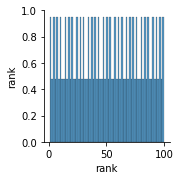

In [63]:
cols = ['song', 'artist', 'rank']
sns_plot = sns.pairplot(data[cols])